## Meta -

This file showcases the different feature selection options available with SKlearn

## Author - Rahul Suresh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import extmath
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2, GenericUnivariateSelect, mutual_info_classif,f_classif

## Dataset

In [2]:
x=[]
y=[]
for i in range(0,100):
    x.append([random.randint(200,300),random.randint(200,300),random.randint(600,1000)])
    y.append(1)
    
for i in range(0,100):
    x.append([random.randint(1,100),random.randint(1,100),random.randint(600,1000)])
    y.append(0)
x=np.array(x)
y=np.array(y)

## Statistical feature selection

In [ ]:
#performing feature selection using chi square test

In [3]:
transformer = GenericUnivariateSelect(chi2, 'k_best', param=2)
x_new = transformer.fit_transform(x, y)
x_new.shape

(200, 2)

In [4]:
chi2(x, y)

(array([1.32151171e+04, 1.27137241e+04, 6.86691863e-01]),
 array([0.        , 0.        , 0.40729189]))

In [5]:
transformer = GenericUnivariateSelect(mutual_info_classif, 'k_best', param=2)
x_new = transformer.fit_transform(x, y)
x_new.shape

(200, 2)

In [6]:
mutual_info_classif(x,y)

array([0.69565343, 0.69565343, 0.        ])

In [7]:
transformer = GenericUnivariateSelect(f_classif, 'k_best', param=2)
x_new = transformer.fit_transform(x, y)
x_new.shape

(200, 2)

In [8]:
f_classif(x,y)

(array([2.06016532e+03, 2.44352658e+03, 3.81464485e-02]),
 array([1.32072896e-106, 2.37690906e-113, 8.45349641e-001]))

## Model based feature selection

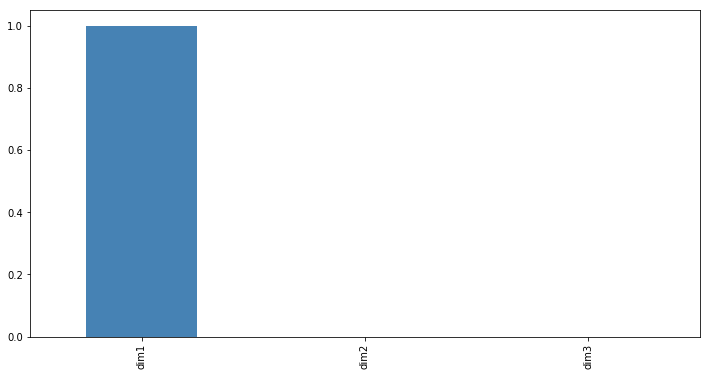

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x,y)

pd.Series(clf.feature_importances_, index=['dim1','dim2','dim3']).plot.bar(color='steelblue', figsize=(12, 6))

In [10]:
from sklearn.feature_selection import SelectFromModel

clf2 = DecisionTreeClassifier()
trans = SelectFromModel(clf2, threshold=0.25)
#if threshold is median then the
x_trans = trans.fit_transform(x,y)

In [11]:
print("We started with {0} features but retained only {1} of them!".format(x.shape[1], x_trans.shape[1]))

We started with 3 features but retained only 1 of them!


## Recursive Feature Elimination 
### It is good for features that are highly corelated and weakly realted to the target vector

In [12]:
from sklearn.feature_selection import RFE

clf = DecisionTreeClassifier()
trans = RFE(clf, n_features_to_select=1)
x_trans = trans.fit_transform(x,y)
print(x_trans.shape)

(200, 1)


In [14]:
#RFECV automatically chooses the number of features

In [13]:
from sklearn.feature_selection import RFECV

clf = DecisionTreeClassifier()
trans = RFECV(clf)
xtrans = trans.fit_transform(x,y)
print(xtrans.shape)

(200, 1)


/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
